In [8]:
!rm /App/output/aggregated_10.csv
!rm -rf /App/output/train_10
!mkdir /App/output/train_10

rm: cannot remove '/App/output/aggregated_10.csv': No such file or directory


## Initial test

### RTT scheduler

In [8]:
%%bash

cd /App/mininettest/ && python3 /App/mininettest/legacyschtest.py --scheduler rtt --rtt 10 --background-tcp
#time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
#echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
#cat /App/logs/server.logs

*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/legacyschtest.py", line 98, in <module>
    do_training(args.sch, args.rtt, args.tcp_background, args.dif_start,args.gap)
  File "/App/mininettest/legacyschtest.py", line 84, in do_training
    exec_test(server_cmd, rtt, tcp_b, dif_start, gap)
  File "/App/mininettest/legacyschtest.py", line 72, in exec_test
    network.stop()
  File "/usr/local/lib/python3.8/dist-packages/mininet/net.py", line 575, in stop
    link.stop()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 507, in stop
    self.delete()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 502, in delete
    self.intf2.delete()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 203, in delete
    self.cmd( 'ip link del ' + self.name )
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 65, in cmd
    return self.node

CalledProcessError: Command 'b'\ncd /App/mininettest/ && python3 /App/mininettest/legacyschtest.py --scheduler rtt --rtt 10 --background-tcp\n#time=$(tail -1 /App/logs/client.logs | awk \'{print $3}\')\n#echo $(bc <<< "scale=2; 2*1024*1024*8/$time") \n#cat /App/logs/server.logs\n'' returned non-zero exit status 1.

In [9]:
!bash /App/mininettest/scripts/create_packets.bash

In [10]:
!python3 /App/mininettest/create_fairness_figure.py

In [11]:
!cat /App/logs/tcp_packets.logs

tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on client-eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
18:55:41.603018 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [S.], seq 3774049798, ack 812824426, win 65160, options [mss 1460,sackOK,TS val 1254929154 ecr 2849707362,nop,wscale 7], length 0
18:55:41.613217 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [.], ack 79, win 509, options [nop,nop,TS val 1254929164 ecr 2849707384], length 0
18:55:41.613922 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 1:18, ack 79, win 509, options [nop,nop,TS val 1254929165 ecr 2849707384], length 17: HTTP: HTTP/1.0 200 OK
18:55:41.614173 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 18:2914, ack 79, win 509, options [nop,nop,TS val 1254929165 ecr 2849707384], length 2896: HTTP
18:55:41.614187 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 2914:5810, ack 79, win 509, options [nop,nop,TS val 1254929165 ecr 2849707384], length 2896: HTTP
18:55:41.618143 IP 

18:55:54.890000 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 6220626:6223522, ack 79, win 509, options [nop,nop,TS val 1254940972 ecr 2849719192], length 2896: HTTP
18:55:54.894879 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 6223522:6226418, ack 79, win 509, options [nop,nop,TS val 1254940979 ecr 2849719199], length 2896: HTTP
18:55:54.899687 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 6226418:6229314, ack 79, win 509, options [nop,nop,TS val 1254940979 ecr 2849719199], length 2896: HTTP
18:55:54.904527 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 6229314:6232210, ack 79, win 509, options [nop,nop,TS val 1254940984 ecr 2849719204], length 2896: HTTP
18:55:54.909365 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 6232210:6235106, ack 79, win 509, options [nop,nop,TS val 1254940989 ecr 2849719209], length 2896: HTTP
18:55:54.914222 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 6235106:6238002, ack 79, win 509, options [nop,nop,TS val 1254940993 ecr 2849719213]

18:56:06.077037 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [.], seq 12736071:12737519, ack 79, win 509, options [nop,nop,TS val 1254950329 ecr 2849728548], length 1448: HTTP
18:56:06.079434 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 12737519:12740415, ack 79, win 509, options [nop,nop,TS val 1254950329 ecr 2849728548], length 2896: HTTP
18:56:06.084247 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 12740415:12743311, ack 79, win 509, options [nop,nop,TS val 1254950329 ecr 2849728548], length 2896: HTTP
18:56:06.089086 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 12743311:12746207, ack 79, win 509, options [nop,nop,TS val 1254950329 ecr 2849728548], length 2896: HTTP
18:56:06.093939 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 12746207:12749103, ack 79, win 509, options [nop,nop,TS val 1254950329 ecr 2849728548], length 2896: HTTP
18:56:06.098771 IP 10.0.0.20.80 > 10.0.0.2.53088: Flags [P.], seq 12749103:12751999, ack 79, win 509, options [nop,nop,TS val 1254950329 ecr 

In [12]:
!cat /App/logs/mpquic_packets_timesize.logs

18:55:42.197605 30
18:55:42.207371 101
18:55:42.207593 1350
18:55:42.209813 1350
18:55:42.212038 1350
18:55:42.214279 1350
18:55:42.216537 1350
18:55:42.218733 1350
18:55:42.220961 1350
18:55:42.223226 1350
18:55:42.225422 1350
18:55:42.227805 1350
18:55:42.230049 1350
18:55:42.232245 1350
18:55:42.234507 1350
18:55:42.236693 1350
18:55:42.238924 1350
18:55:42.241149 1350
18:55:42.243442 1350
18:55:42.245638 1350
18:55:42.247893 1350
18:55:42.250092 1350
18:55:42.252277 1350
18:55:42.254503 1350
18:55:42.256745 1350
18:55:42.259010 1350
18:55:42.261255 1066
18:55:42.262973 29
18:55:42.284951 31
18:55:42.437646 36
18:55:42.459569 1350
18:55:42.466645 1350
18:55:42.468872 1350
18:55:42.471097 1350
18:55:42.473291 1350
18:55:42.475516 1350
18:55:42.477781 1350
18:55:42.479993 1350
18:55:42.482239 1350
18:55:42.484469 1350
18:55:42.486653 1350
18:55:42.488873 1350
18:55:42.491111 1350
18:55:42.493376 1350
18:55:42.495566 1350
18:55:42.497774 1350
18:55:42.500003 1350
18:55:42.502235 1350
1

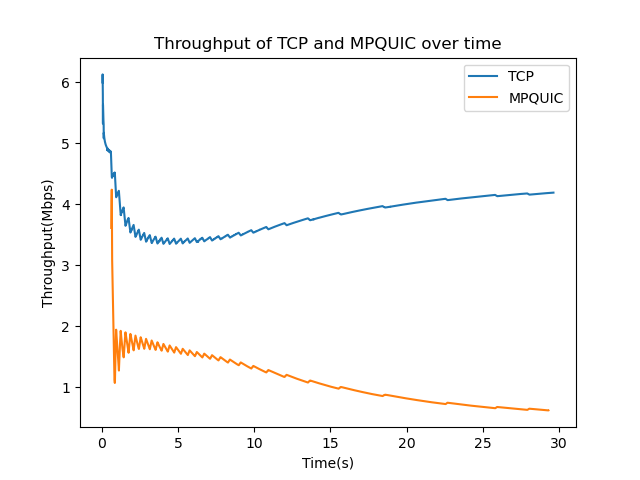

In [13]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

In [15]:
%%bash

cd /App/mininettest/ && python3 /App/mininettest/legacyschtest.py --different-start 1 --gap 4 --scheduler rtt --rtt 10 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs

559.24
Serving new connection: 34afaaf92ba70420, version 512 from 10.0.0.1:53901
GET 10.0.0.20:6121/test3
Responding with 200


*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/legacyschtest.py", line 98, in <module>
    do_training(args.sch, args.rtt, args.tcp_background, args.dif_start,args.gap)
  File "/App/mininettest/legacyschtest.py", line 84, in do_training
    exec_test(server_cmd, rtt, tcp_b, dif_start, gap)
  File "/App/mininettest/legacyschtest.py", line 72, in exec_test
    network.stop()
  File "/usr/local/lib/python3.8/dist-packages/mininet/net.py", line 575, in stop
    link.stop()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 507, in stop
    self.delete()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 502, in delete
    self.intf2.delete()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 203, in delete
    self.cmd( 'ip link del ' + self.name )
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 65, in cmd
    return self.node

In [16]:
!bash /App/mininettest/scripts/create_packets.bash
!python3 /App/mininettest/create_fairness_figure.py

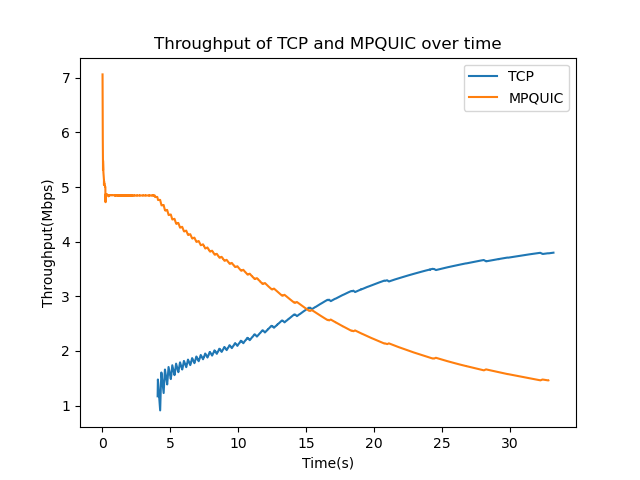

In [17]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

In [18]:
%%bash

cd /App/mininettest/ && python3 /App/mininettest/legacyschtest.py --different-start 2 --gap 4 --scheduler rtt --rtt 10 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs


Serving new connection: d60d0668d09e8948, version 512 from 10.0.0.1:44700
GET 10.0.0.20:6121/test3
Responding with 200


*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/legacyschtest.py", line 98, in <module>
    do_training(args.sch, args.rtt, args.tcp_background, args.dif_start,args.gap)
  File "/App/mininettest/legacyschtest.py", line 84, in do_training
    exec_test(server_cmd, rtt, tcp_b, dif_start, gap)
  File "/App/mininettest/legacyschtest.py", line 72, in exec_test
    network.stop()
  File "/usr/local/lib/python3.8/dist-packages/mininet/net.py", line 575, in stop
    link.stop()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 507, in stop
    self.delete()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 502, in delete
    self.intf2.delete()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 203, in delete
    self.cmd( 'ip link del ' + self.name )
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 65, in cmd
    return self.node

In [19]:
!bash /App/mininettest/scripts/create_packets.bash
!python3 /App/mininettest/create_fairness_figure.py

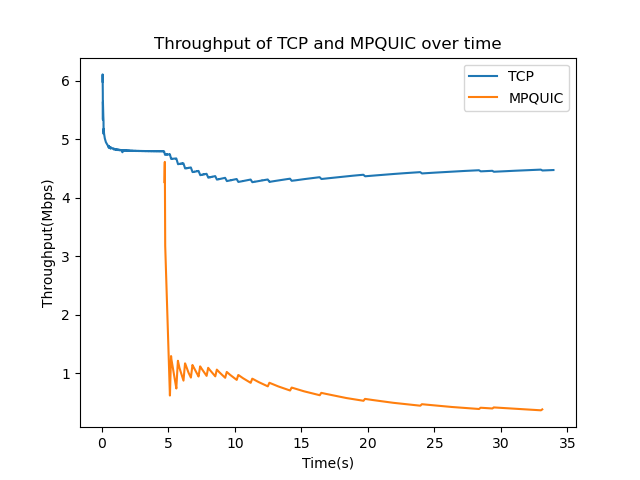

In [13]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

### Trained DQNAgent

In [20]:
%%bash

cd /App/mininettest/ && python3 /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_55168_steps.h5 --rtt 10 --valid_congestion 0 --background-tcp

*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 114, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.dif_start, args.gap, args.rtt, args.vcong, args.tcp_background, args.validating)
  File "/App/mininettest/congestiontest.py", line 97, in do_training
    exec_test(server_cmd, rtt, tcp_b, dif_start, gap)
  File "/App/mininettest/congestiontest.py", line 78, in exec_test
    network.stop()
  File "/usr/local/lib/python3.8/dist-packages/mininet/net.py", line 575, in stop
    link.stop()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 507, in stop
    self.delete()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 502, in delete
    self.intf2.delete()
  File "/usr/local/lib/python3.8/dist-packages/mininet/link.py", line 203, in delete
    self.cmd( 'ip link del ' + self.name )
  File "/usr/local/lib/python3.8/dis

CalledProcessError: Command 'b'\ncd /App/mininettest/ && python3 /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_55168_steps.h5 --rtt 10 --valid_congestion 0 --background-tcp\n'' returned non-zero exit status 1.

In [ ]:
!bash /App/mininettest/scripts/create_packets.bash

In [ ]:
!python3 /App/mininettest/create_fairness_figure.py

In [4]:
!wc /App/logs/mpquic_packets_timesize.logs

 2506  5012 52454 /App/logs/mpquic_packets_timesize.logs


In [5]:
!wc /App/logs/tcp_packets_timesize.logs

 15217  30434 319550 /App/logs/tcp_packets_timesize.logs


In [ ]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

In [ ]:
%%bash

cd /App/mininettest/ && python3 /App/mininettest/congestiontest.py --different-start 1 --gap 4 --weight_file /App/output/train_0/weights_55168_steps.h5 --rtt 10 --valid_congestion 0 --background-tcp
bash /App/mininettest/scripts/create_packets.bash
python3 /App/mininettest/create_fairness_figure.py

In [ ]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

In [ ]:
%%bash

cd /App/mininettest/ && python3 /App/mininettest/congestiontest.py --different-start 2 --gap 4 --weight_file /App/output/train_0/weights_55168_steps.h5 --rtt 10 --valid_congestion 0 --background-tcp
bash /App/mininettest/scripts/create_packets.bash
python3 /App/mininettest/create_fairness_figure.py

In [ ]:
import IPython
IPython.display.Image("/App/output/tcp_mpquic.png")

## Comparison

In [11]:
%%bash
rm /App/logs/client.logs
echo 24050 > /App/output/train_10/validate_24050.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_24050_steps.h5f --rtt 10 --valid_congestion 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_10/validate_24050.csv
done

*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
( ip link del s1-eth3 ) 2> /dev/null
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup co

In [16]:
%%bash
rm /App/logs/client.logs
echo 0 > /App/output/train_10/validate_rtt.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python /App/mininettest/legacyschtest.py --scheduler rtt --rtt 10  --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_10/validate_rtt.csv
done

*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup complete.
*** Error setting resource li

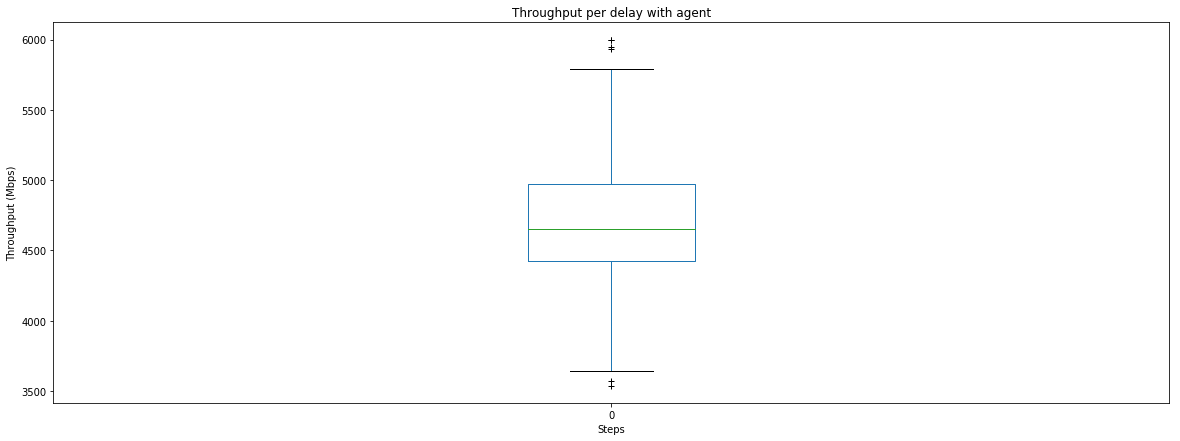

In [17]:
import pandas


rtt_sch = pandas.read_csv("/App/output/train_10/validate_rtt.csv")

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)


(2*8 * 1024 * 1024 / rtt_sch).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

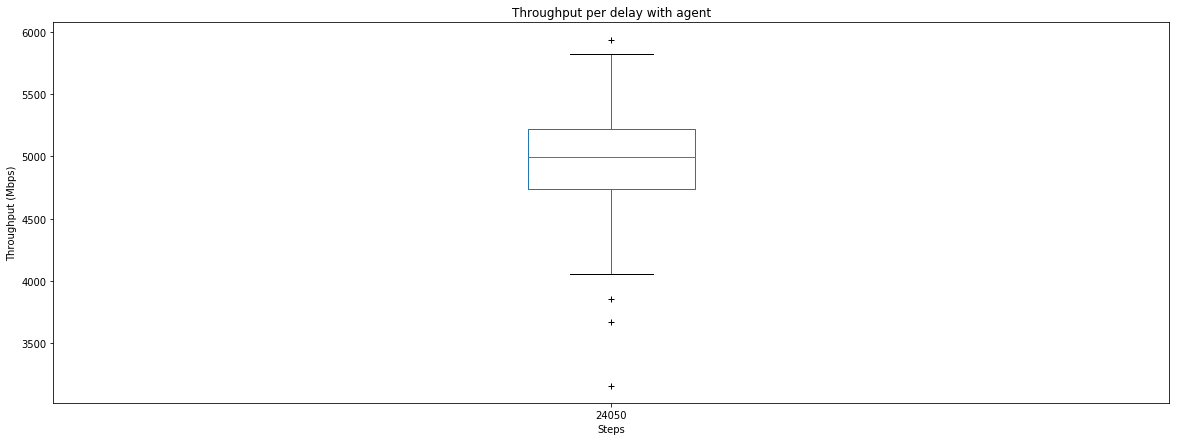

In [18]:
rtt_24050= pandas.read_csv("/App/output/train_10/validate_24050.csv")
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)
(2*8 * 1024 * 1024 / rtt_24050).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

In [19]:
(2*8 * 1024 * 1024 / rtt_24050).median()

24050    4991.882758
dtype: float64

In [20]:
(2*8 * 1024 * 1024 / rtt_24050).mean()

24050    4965.78664
dtype: float64

In [21]:
(2*8 * 1024 * 1024 / rtt_sch).median()

0    4649.942752
dtype: float64

In [22]:
(2*8 * 1024 * 1024 / rtt_sch).mean()

0    4719.09149
dtype: float64